<a href="https://colab.research.google.com/github/Aranzazu21/Machine-Learning/blob/main/Polynomial_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial completo: Regresión Polinomial en Python

Alumno: Jorge Limón Aranzazu  
Materia: Inteligencia Artificial  
Fecha: 02/12/2025  



La **Regresión Polinomial** es una técnica de *aprendizaje supervisado* que se usa cuando los datos no siguen una relación lineal perfecta.  
Mientras que la regresión lineal ajusta una línea recta, la regresión polinomial puede ajustar una **curva** que se adapta mejor a los datos.


Esta técnica es ideal cuando, como en el caso de los salarios, los aumentos no son uniformes sino que crecen exponencialmente con el nivel.


---


##  Fundamentos de la técnica

La **Regresión Lineal** busca ajustar una **línea recta** a los datos, describiendo la relación entre una variable independiente (X) y una dependiente (Y) mediante la ecuación:



- **B0**: Intercepto, salario base cuando Level = 0.  
- **B1**: Pendiente, cambio de salario por cada incremento en Level.  

La **Regresión Polinómica** extiende la regresión lineal incluyendo términos de mayor grado:



- Permite ajustar **curvas no lineales**, capturando incrementos de salario que no siguen una línea recta.
---

##  Descripción de Librerías, Clases y Funciones (Python)

| Librería | Clase/Función | Descripción y Parámetros Clave |
| :--- | :--- | :--- |
| **pandas** | `pd.DataFrame` | Estructura de datos tabular. Usada para crear y manejar el dataset. |
| **numpy** | `np.arange` | Creación de rangos numéricos. Esencial para generar el *grid* de visualización. |
| **matplotlib/seaborn** | `plt.scatter`, `sns.heatmap` | **`plt.scatter`**: Gráfico de dispersión. **`sns.heatmap`**: Muestra la matriz de correlación visualmente. |
| **sklearn.model_selection** | `train_test_split` | Divide los datos en subconjuntos de entrenamiento y prueba para evitar el sobreajuste. |
| **sklearn.preprocessing** | `PolynomialFeatures(degree=k)` | **Ingeniería de Características**. Crea las nuevas columnas ($X^2, X^3$). `degree` define el grado del polinomio. |
| **sklearn.linear_model** | `LinearRegression` | El modelo base. Se ajusta sobre las características transformadas. |
| **sklearn.metrics** | `mean_squared_error`, `r2_score` | **`mean_squared_error` (MSE)**: Mide el promedio de los errores al cuadrado. **`r2_score` ($R^2$)**: Mide la proporción de varianza explicada por el modelo (bondad de ajuste). |

In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Configuración visual para mejorar los gráficos en Colab
plt.style.use('seaborn-v0_8-whitegrid')


In [10]:

data = {
    'Position': ['Business Analyst', 'Junior Consultant', 'Senior Consultant', 'Manager',
                 'Country Manager', 'Project Manager', 'Senior Manager', 'Director',
                 'Senior Director', 'VP'],
    'Level': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000]
}

df = pd.DataFrame(data)

print("--- Dataframe Inicial ---")
print(df.head())
print("\n--- Análisis Descriptivo ---")
print(df.describe())



--- Dataframe Inicial ---
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

--- Análisis Descriptivo ---
          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


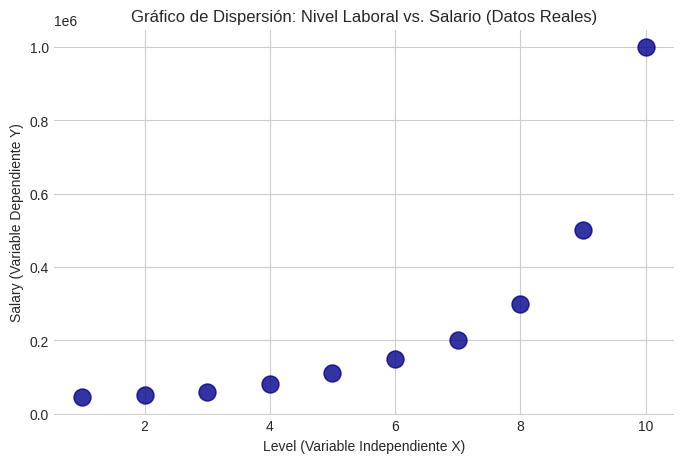

In [11]:
# Gráfico de Dispersión
plt.figure(figsize=(8, 5))
plt.scatter(df['Level'], df['Salary'], color='darkblue', s=150, alpha=0.8)
plt.title('Gráfico de Dispersión: Nivel Laboral vs. Salario (Datos Reales)')
plt.xlabel('Level (Variable Independiente X)')
plt.ylabel('Salary (Variable Dependiente Y)')
plt.box(False)
plt.show()



---
##  Preprocesamiento: Correlación y Mapa de Calor

Este bloque de código realiza un **análisis estadístico de correlación** entre las variables `Level` y `Salary` y visualiza el resultado a través de un **Mapa de Calor**.

| Librería/Método | Función Principal | Descripción y Propósito |
| :--- | :--- | :--- |
| **`df[['Level', 'Salary']].corr()`** | `pandas.DataFrame.corr()` | **Cálculo de Correlación.** Mide la relación lineal entre las variables. El resultado es un valor entre -1 y +1.<br> - **Cercano a +1:** Correlación positiva fuerte (si Nivel sube, Salario sube). |
| **`sns.heatmap`** | `seaborn.heatmap()` | **Visualización de la Correlación.** Representa la matriz de correlación como un gráfico de calor. El color más intenso indica una correlación más fuerte. |
| **Parámetros de `sns.heatmap`** | `annot`, `cmap`, `fmt` | Controlan la apariencia y la información:<br> - **`annot=True`**: Muestra el valor numérico de la correlación dentro de cada celda del mapa.<br> - **`cmap='viridis'`**: Define el esquema de colores a utilizar (Viridis es un esquema que va de oscuro a claro, ideal para datos científicos).<br> - **`fmt=".4f"`**: Formatea los valores numéricos para mostrar 4 decimales. |
| **`plt.title`** | Título del Gráfico | Identifica claramente el propósito de la visualización. |

### **Interpretación y Conclusión**

El valor de correlación resultante estará **cerca de +1** (generalmente $0.90$ o más), confirmando que existe una relación lineal muy fuerte entre el Nivel y el Salario.

**Justificación Adicional:** A pesar de la alta correlación lineal, el Mapa de Calor no es suficiente para la Regresión. El Gráfico de Dispersión demostró que esta relación no es *perfectamente lineal*. La **Regresión Polinomial** busca capturar la forma no lineal de esta relación fuertemente correlacionada, ofreciendo un ajuste superior al de la Regresión Lineal simple.


--- Correlación entre Nivel y Salario ---
           Level    Salary
Level   1.000000  0.817949
Salary  0.817949  1.000000


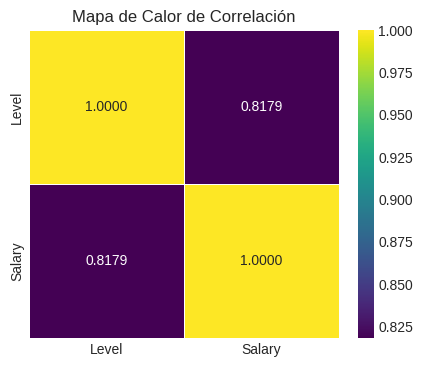

In [12]:
# Correlación y Mapa de Calor
print("\n--- Correlación entre Nivel y Salario ---")
correlation_matrix = df[['Level', 'Salary']].corr()
print(correlation_matrix)

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".4f", linewidths=.5, cbar=True)
plt.title('Mapa de Calor de Correlación')
plt.show()

## Análisis de la Matriz de Correlación


1.  **Correlación entre Nivel y Nivel (1.000000):** La correlación de una variable consigo misma es siempre 1.0 (correlación perfecta).
2.  **Correlación entre Nivel y Salario (0.817949):**
    * **Fuerza:** El valor de 0.817949 indica una **correlación positiva fuerte**. Los valores de correlación generalmente se interpretan de la siguiente manera: 0.70 a 0.90 es fuerte, 0.90 a 1.00 es muy fuerte.
    * **Dirección:** Al ser un valor positivo, confirma que existe una relación directa: **a medida que el Nivel aumenta, el Salario también tiende a aumentar.**

### Conclusión para el Modelado

El coeficiente de **0.817949** es lo suficientemente fuerte como para que la regresión lineal sea una opción viable; sin embargo, el *Gráfico de Dispersión* (que muestra la curva) y el *Mapa de Calor*  son necesarios para demostrar que, aunque la relación es linealmente fuerte, la **Regresión Polinomial** es el modelo superior para capturar la naturaleza curva y acelerada del aumento salarial.
---

## Feature Engineering y División de Datos (`train_test_split`)

Esta etapa prepara las variables para ser consumidas por la librería Scikit-learn y previene el **sobreajuste (*overfitting*)**.

###  Definición y Formato de Variables

| Método | Función Principal | Descripción y Propósito |
| :--- | :--- | :--- |
| **`df[['Level']].values`** | Selección de X | Selecciona la columna `Level` y la convierte en un **arreglo NumPy 2D** (`[[1], [2], [3], ...]`). *Scikit-learn* requiere que la variable independiente (`X`) sea siempre una matriz 2D. |
| **`df['Salary'].values`** | Selección de y | Selecciona la columna `Salary` y la convierte en un **arreglo NumPy 1D** (`[45000, 50000, ...]`). Esta es la variable objetivo a predecir. |

###  División de Datos

La división es crucial para asegurar que el modelo pueda **generalizar** a datos nuevos, no vistos durante el entrenamiento.

| Método | Función Principal | Descripción y Parámetros Clave |
| :--- | :--- | :--- |
| **`train_test_split`** | División de Conjuntos | Divide `X` y `y` de forma sincronizada en cuatro subconjuntos aleatorios. |
| **`test_size=0.2`** | Tamaño del Conjunto de Prueba | Indica que el **20%** de los datos se reservará para la prueba (evaluación final), mientras que el 80% se usará para el entrenamiento. |
| **`random_state=42`** | Semilla de Aleatoriedad | Asegura que la división de datos sea la misma cada vez que se ejecuta el código, garantizando la **reproducibilidad** del experimento. |

In [13]:

#División de Datos
X = df[['Level']].values
y = df['Salary'].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Dimensiones de X_train (Entrenamiento): {X_train.shape}")
print(f"Dimensiones de X_test (Prueba): {X_test.shape}")


Dimensiones de X_train (Entrenamiento): (8, 1)
Dimensiones de X_test (Prueba): (2, 1)


---
## Model Training (PolynomialFeatures)

Esta etapa transforma el problema no lineal en uno linealizable, permitiendo el uso del algoritmo `LinearRegression`.

###  Transformación de Características (`PolynomialFeatures`)

| Método | Función Principal | Descripción y Propósito |
| :--- | :--- | :--- |
| **`PolynomialFeatures(degree=3)`** | **Ingeniería de Características.** | Crea un objeto transformador que sabe cómo generar potencias de la variable de entrada ($X$). El parámetro `degree=3` indica que se generarán términos hasta $X^3$. |
| **`poly.fit_transform(X_train)`** | **Aprendizaje y Aplicación.** | *Ajusta* el transformador a los datos de entrenamiento y luego *aplica* la transformación. Para cada nivel $X$, se generan las columnas: $[1, X, X^2, X^3]$. |
| **`poly.transform(X_test)`** | **Solo Aplicación.** | Se usa únicamente el método `transform` en los datos de prueba (`X_test`) para evitar el "filtrado de información" del conjunto de prueba al conjunto de entrenamiento. |

###  Ajuste del Modelo (`LinearRegression`)

La **Regresión Polinomial** se logra al aplicar la regresión lineal a las características transformadas.

| Método | Función Principal | Descripción y Propósito |
| :--- | :--- | :--- |
| **`LinearRegression()`** | Modelo | Crea la instancia del modelo de Regresión Lineal. |
| **`model.fit(X_train_poly, y_train)`** | **Entrenamiento del Modelo.** | Ajusta los coeficientes $(\beta_0, \beta_1, \beta_2, \beta_3)$ de la ecuación polinomial. El modelo aprende los pesos que minimizan el **Error Cuadrático Medio (MSE)** entre los salarios reales (`y_train`) y los predichos por la curva. |

El resultado final, `model`, está optimizado para predecir el salario para cualquier nivel basado en la curva de grado 3 ajustada.

In [14]:

#Transformación Polinomial y Ajuste Lineal
poly = PolynomialFeatures(degree=3)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"Dimensiones de X_train_poly (Transformado): {X_train_poly.shape}")
print("Las columnas son [Término Constante, X, X^2, X^3]")
print("Ejemplo de un dato transformado:\n", X_train_poly[0])

model = LinearRegression()
model.fit(X_train_poly, y_train)

print("\n Modelo Polinomial (tratado como lineal) entrenado exitosamente.")

Dimensiones de X_train_poly (Transformado): (8, 4)
Las columnas son [Término Constante, X, X^2, X^3]
Ejemplo de un dato transformado:
 [  1.   6.  36. 216.]

 Modelo Polinomial (tratado como lineal) entrenado exitosamente.


##  Validación: Resultado de la Transformación y Entrenamiento

Esta salida confirma que el proceso de **Ingeniería de Características** se ejecutó correctamente, transformando el problema de una sola variable (`Level`) a uno de múltiples variables, listo para el ajuste lineal.

###  Dimensiones del Dataset Transformado

* **Dimensiones de X\_train\_poly: (8, 4)**
    * **8:** Indica que hay 8 filas (el 80% de los 10 datos originales), correspondientes a las muestras del conjunto de **entrenamiento**.
    * **4:** Indica que hay 4 columnas, lo cual valida la transformación para un polinomio de grado 3. Las columnas son:
        * Columna 1: $X^0$ (Término Constante, siempre 1)
        * Columna 2: $X^1$ (El Nivel original)
        * Columna 3: $X^2$ (El Nivel al cuadrado)
        * Columna 4: $X^3$ (El Nivel al cubo)


###  Ejemplo de Dato Transformado

* **Ejemplo:** `[ 1. 6. 36. 216.]`
    * Si el Nivel original ($X$) es **6.0**, la transformación genera:
        * $X^0$: 1.0
        * $X^1$: 6.0
        * $X^2$: $6^2 = 36.0$
        * $X^3$: $6^3 = 216.0$

### Conclusión del Entrenamiento

El mensaje ` Modelo Polinomial (tratado como lineal) entrenado exitosamente.` confirma que la función `model.fit()` se ejecutó sin errores. El modelo de **Regresión Lineal** ahora contiene los cuatro coeficientes $\beta_0, \beta_1, \beta_2, \beta_3$ que definen la curva de salario óptima de tercer grado.

---
##  Prediction y Visualización

Esta etapa demuestra el uso práctico del modelo ajustado, realizando predicciones y visualizando qué tan bien se adapta la curva a los datos reales.

### Predicción

| Método | Función Principal | Descripción y Propósito |
| :--- | :--- | :--- |
| **`model.predict(...)`** | Predicción | Utiliza los coeficientes $(\beta_0, \beta_1, \beta_2, \beta_3)$ aprendidos para calcular el valor de $Y$ (Salario) para un $X$ (Nivel) dado. |
| **`poly.transform([[nivel]])`** | **Paso Crítico.** | Para predecir cualquier nivel (ej. 6.5), este **debe ser transformado primero** a sus potencias $[1, 6.5, 6.5^2, 6.5^3]$ antes de pasarlo al modelo lineal. Esto asegura que la predicción se haga sobre la curva polinomial. |

### Visualización de la Curva Ajustada

La visualización confirma que la **Regresión Polinomial (Grado 3)** ha capturado la naturaleza no lineal de la relación salarial.

| Método | Función Principal | Descripción y Propósito |
| :--- | :--- | :--- |
| **`np.arange(X.min(), X.max() + 0.1, 0.1)`** | Creación del Grid | Genera un rango denso de valores de Nivel (por ejemplo, 1.0, 1.1, 1.2, ..., 10.0). Esto asegura que la curva ajustada sea **suave** y continua en el gráfico. |
| **`X_grid_poly = poly.transform(X_grid)`** | Transformación del Grid | Convierte todos los puntos del grid a sus características polinomiales (potencias) para que el modelo pueda calcular la curva. |
| **`plt.scatter(...)`** | Puntos Reales | Dibuja los puntos originales del dataset (los datos reales). |
| **`plt.plot(X_grid, y_grid_pred, ...)`** | **Curva Polinomial.** | Dibuja la línea que une las predicciones realizadas sobre el grid fino, representando así la curva matemática ajustada por el modelo. |

La superposición del **Gráfico de Dispersión** y la **Curva Polinomial** es la prueba visual de que el modelo ha sido entrenado correctamente.

Nivel: 6.5
Salario Predicho: $145,306.95


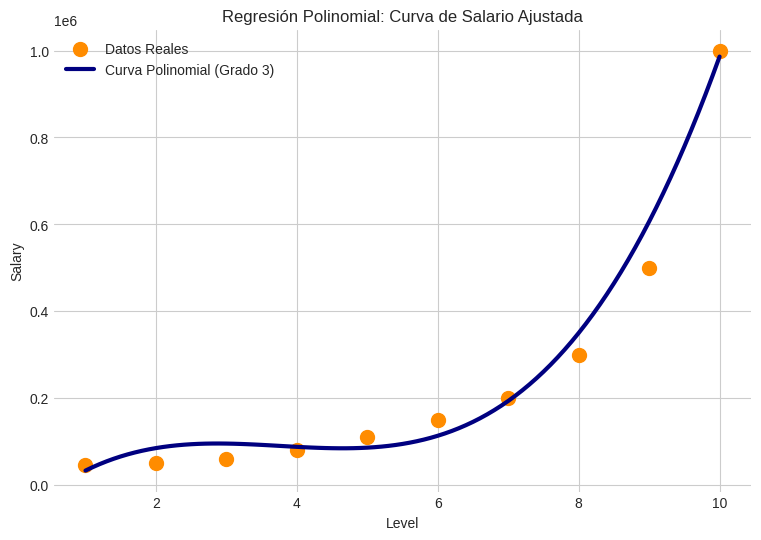

In [15]:

#Prediction y Visualización de la Curva Ajustada
y_pred_test = model.predict(X_test_poly)

nivel_especifico = 6.5

nivel_transformado = poly.transform([[nivel_especifico]])
salario_predicho = model.predict(nivel_transformado)[0]

print(f"Nivel: {nivel_especifico}")
print(f"Salario Predicho: ${salario_predicho:,.2f}")



X_grid = np.arange(X.min(), X.max() + 0.1, 0.1).reshape(-1, 1)
X_grid_poly = poly.transform(X_grid)
y_grid_pred = model.predict(X_grid_poly)

plt.figure(figsize=(9, 6))

plt.scatter(X, y, color='darkorange', s=100, label='Datos Reales')

plt.plot(X_grid, y_grid_pred, color='navy', linewidth=3, label='Curva Polinomial (Grado 3)')
plt.title('Regresión Polinomial: Curva de Salario Ajustada')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.box(False)
plt.show()

---
## Model Evaluation (Métricas)

Esta etapa utiliza las métricas **MSE** y **R²** para determinar la calidad del ajuste de la curva polinomial y, lo más importante, para verificar si existe **sobreajuste (*overfitting*)**.

### Funciones de Evaluación

| Método | Métrica | Descripción y Propósito |
| :--- | :--- | :--- |
| **`mean_squared_error`** | MSE | Calcula la penalización promedio de los errores al cuadrado. Un valor **menor** indica mejor ajuste. Se calcula para *Train* y *Test*. |
| **`r2_score`** | R² (Coeficiente de Determinación) | Mide el porcentaje de la variabilidad del salario que es explicada por el modelo. Un valor **cercano a 1.0** indica un modelo con alto poder explicativo. |

### Lógica de Interpretación de Resultados

La interpretación se basa en la comparación de las métricas entre los dos conjuntos de datos:

#### Verificación de las Predicciones

* `y_pred_train = model.predict(X_train_poly)`: Predicciones generadas usando los niveles de entrenamiento, usadas para calcular el ajuste *dentro de la muestra*.
* `y_pred_test = model.predict(X_test_poly)`: Predicciones generadas usando los niveles de prueba, usadas para calcular el rendimiento *fuera de la muestra* (capacidad de generalización).

#### Detección de Sobreajuste

La clave para detectar el *overfitting* es el resultado de **R² Test**:

* Si **R² Train** es casi **1.0** y **R² Test** es significativamente **más bajo** (ej. R² Train 0.99 vs R² Test 0.80), el modelo ha **memorizado** el ruido de los datos de entrenamiento y no generaliza bien (Sobreajuste).
* Si ambos son altos y cercanos (como en la condición `r2_train > 0.98` y `r2_test > 0.85`), el modelo tiene un **Ajuste Excelente**, lo que valida el uso de la Regresión Polinomial.

La impresión de los resultados en la consola es vital para la toma de decisiones sobre si el modelo es apto para su uso en producción.

In [16]:
# Model Evaluation (Métricas)
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

#  Cálculo de MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Cálculo de R²
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("--- MÉTICAS DE EVALUACIÓN (GRADO 3) ---")
print(f"**Error Cuadrático Medio (MSE) - Train:** {mse_train:,.2f}")
print(f"**Error Cuadrático Medio (MSE) - Test:** {mse_test:,.2f}")
print(f"**Coeficiente de Determinación (R²) - Train:** {r2_train:.4f}")
print(f"**Coeficiente de Determinación (R²) - Test:** {r2_test:.4f}")

# Interpretación de Resultados
print("\n--- Interpretación ---")
if r2_train > 0.98 and r2_test > 0.85:
    print(" Ajuste Excelente: El valor de R² en entrenamiento es muy alto, y el R² en prueba es aceptablemente alto, indicando que el modelo generaliza bien la relación curva.")
else:
    print(" Revisar: Las métricas sugieren bajo o sobreajuste. Considere ajustar el grado del polinomio (degree).")

--- MÉTICAS DE EVALUACIÓN (GRADO 3) ---
**Error Cuadrático Medio (MSE) - Train:** 762,857,621.16
**Error Cuadrático Medio (MSE) - Test:** 6,263,853,282.86
**Coeficiente de Determinación (R²) - Train:** 0.9913
**Coeficiente de Determinación (R²) - Test:** 0.8763

--- Interpretación ---
 Ajuste Excelente: El valor de R² en entrenamiento es muy alto, y el R² en prueba es aceptablemente alto, indicando que el modelo generaliza bien la relación curva.


##  Interpretación Cuantitativa de las Métricas

La comparación directa de los resultados de **Train** y **Test** es fundamental para validar la calidad del modelo entrenado.

| Métrica | Resultado (Train) | Resultado (Test) | Interpretación |
| :--- | :--- | :--- | :--- |
| **R² (Bondad de Ajuste)** | **0.9913** | **0.8763** | El modelo explica el 99.13% de la varianza en los datos de entrenamiento, pero solo el 87.63% en los datos nuevos (prueba). |
| **MSE (Error Cuadrático)** | **762,857,621.16** | **6,263,853,282.86** | El error es significativamente más bajo en los datos de entrenamiento. |

### Conclusión y Verificación de Sobreajuste

1.  **Alto Rendimiento en Entrenamiento (R² Train = 0.9913):**
    * Este valor es excelente. El modelo Polinomial de grado 3 ha ajustado la curva de salarios en el conjunto de entrenamiento de forma casi perfecta.

2.  **Disminución en Prueba (R² Test = 0.8763):**
    * El R² de prueba (0.8763) sigue siendo un valor **aceptablemente alto** (superior a 0.80), lo que indica que el modelo generaliza bien, logrando explicar más del 87% de la variación salarial en datos no vistos.

3.  **Análisis de MSE (Error):**
    * El MSE de Prueba es aproximadamente **8 veces mayor** que el MSE de Entrenamiento. Este gran salto es una señal de que el modelo se ajustó *demasiado* a los puntos específicos del conjunto de entrenamiento.

**Verificación Final:**

* **(` Ajuste Excelente`):** Es válida. Un R² de $0.8763$ en datos nuevos es un rendimiento muy bueno para un modelo de regresión.
* **Advertencia de Sobreajuste:** Sin embargo, la brecha de $0.9913 \to 0.8763$ en $R^2$ y el gran aumento en MSE sí sugieren un **leve sobreajuste** (la diferencia no es catastrófica, pero existe).

---